In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = yf.download('BTC-USD','2015-01-01','2024-10-10')

[*********************100%***********************]  1 of 1 completed


In [3]:
data = pd.DataFrame(data)

In [4]:
data.reset_index(inplace=True)

In [5]:
data.drop(columns = ['Date','Open','High','Low','Adj Close','Volume'], inplace=True)

In [6]:
data

,Close
0,314.248993
1,315.032013
2,281.082001
3,264.195007
4,274.473999
...,...
3564,62067.476562
3565,62089.949219
3566,62818.953125
3567,62236.660156


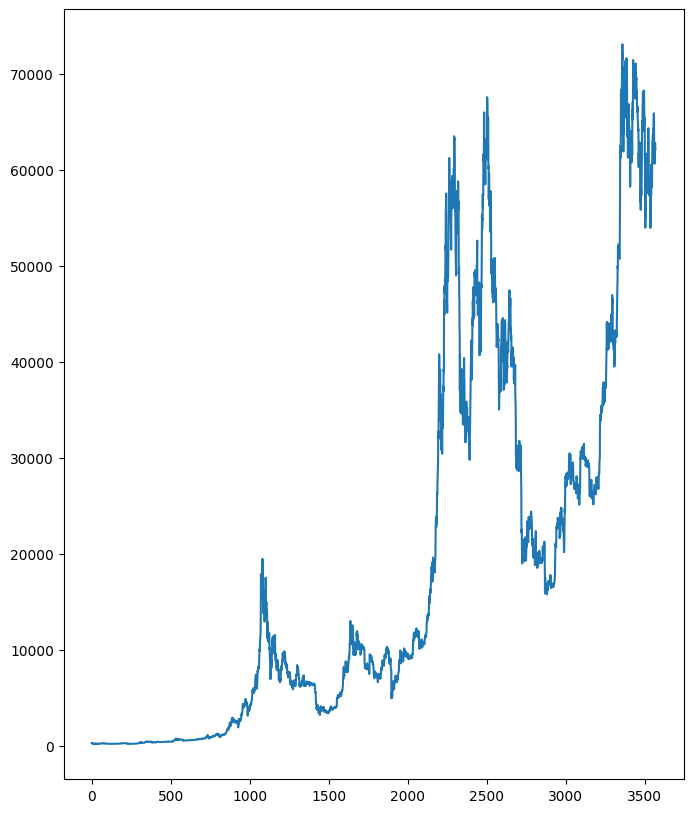

In [7]:
plt.figure(figsize=(8,10))
plt.plot(data)
plt.show()

In [8]:
train_data = data[:-100]
test_data = data[-100:]

In [9]:
train_data.shape

(3469, 1)

In [10]:
test_data.shape

(100, 1)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [12]:
train_data_scale = scaler.fit_transform(train_data)

In [13]:
base_days = 100

In [14]:
x = []
y = []
for i in range(base_days, train_data_scale.shape[0]):
    x.append(train_data_scale[i-base_days:i])
    y.append(train_data_scale[i,0])

In [15]:
x, y = np.array(x), np.array(y)

In [16]:
x = np.reshape(x, (x.shape[0],x.shape[1],1))

In [17]:
from keras.layers import LSTM, Dense, Dropout, Input
from keras.models import Sequential

In [18]:
model = Sequential()
model.add(Input(shape=(x.shape[1], 1)))
model.add(LSTM(50, activation = 'relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(60, activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(80, activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [21]:
model.fit(x, y, epochs=25, batch_size=32, verbose=1)

Epoch 1/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - loss: 0.0401
Epoch 2/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - loss: 0.0055
Epoch 3/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - loss: 0.0047
Epoch 4/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - loss: 0.0047
Epoch 5/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - loss: 0.0039
Epoch 6/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - loss: 0.0038
Epoch 7/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 470s 2s/step - loss: 0.0041
Epoch 8/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - loss: 0.0034
Epoch 9/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - loss: 0.0032
Epoch 10/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - loss: 0.0033
Epoch 11/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - loss: 0.0029
Epoch 12/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - loss: 0.0032
Epoch 13/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - loss: 0.0026
Epoch 14/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - loss: 0.0027
Epoch 15/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 14

In [22]:
test_data = pd.concat((train_data.tail(100), test_data), ignore_index=True)

In [23]:
test_data

,Close
0,64062.203125
1,67234.171875
2,69958.812500
3,69987.835938
4,69455.343750
...,...
195,62067.476562
196,62089.949219
197,62818.953125
198,62236.660156


In [24]:
test_data_scale = scaler.transform(test_data)

In [25]:
x = []
y = [] 

for i in range(base_days, test_data_scale.shape[0]):
    x.append(test_data_scale[i-base_days:i])
    y.append(test_data_scale[i,0])

In [26]:
x, y = np.array(x), np.array(y)

In [27]:
x = np.reshape(x, (x.shape[0],x.shape[1],1))

In [28]:
pred = model.predict(x)

4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step 


In [29]:
pred = scaler.inverse_transform(pred)

In [30]:
pred

array([[63224.355],
       [63269.95 ],
       [63475.83 ],
       [63672.152],
       [63609.125],
       [63203.957],
       [62585.508],
       [61813.484],
       [61004.945],
       [60329.26 ],
       [59877.035],
       [59651.664],
       [59635.387],
       [59832.137],
       [60249.57 ],
       [60938.49 ],
       [61867.766],
       [62916.266],
       [63937.09 ],
       [64924.105],
       [65863.3  ],
       [66752.78 ],
       [67527.266],
       [68050.37 ],
       [68247.88 ],
       [68167.25 ],
       [67999.875],
       [67874.78 ],
       [67869.92 ],
       [67929.95 ],
       [67972.96 ],
       [67883.66 ],
       [67674.28 ],
       [67218.57 ],
       [66509.84 ],
       [65540.11 ],
       [64254.63 ],
       [62798.94 ],
       [61318.887],
       [60120.426],
       [59402.36 ],
       [59216.14 ],
       [59436.383],
       [59922.633],
       [60580.703],
       [61225.31 ],
       [61671.1  ],
       [61902.285],
       [61982.64 ],
       [61934.55 ],


In [31]:
#future Bitcoin Price

In [32]:
m = y
z= []
future_days = 10
for i in range(base_days, len(m)+future_days):
    m = m.reshape(-1,1)
    inter = [m[-base_days:,0]]
    inter = np.array(inter)
    inter = np.reshape(inter, (inter.shape[0], inter.shape[1],1))
    pred = model.predict(inter)
    m = np.append(m ,pred)
    z = np.append(z, pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


In [33]:
z = np.array(z)
z = scaler.inverse_transform(z.reshape(-1,1))

In [34]:
z

array([[63499.80329414],
       [63746.60163764],
       [64122.27882876],
       [64577.29616419],
       [65065.53050384],
       [65551.85716886],
       [66014.5095483 ],
       [66442.95414945],
       [66834.31859662],
       [67189.88046689]])

In [35]:
model.save('Bitcoin_Price_Prediction.keras')